In [1]:
import os
import sys
pdir = os.path.dirname(os.getcwd())
sys.path.append(pdir)

import numpy as np
import torch
import pandas as pd
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader

import utils
from simpleview_pytorch import SimpleView

In [2]:
cloud = utils.pc_from_txt("../data/treesXYZ/alt01_24.txt")
cloud = utils.center_and_scale(cloud)

In [3]:
if None:
    %%time
    sample_images = utils.get_depth_images_from_cloud(cloud, image_dim=256, use_hard_min=True)
    utils.plot_depth_images(sample_images)

CPU times: user 4.1 s, sys: 458 ms, total: 4.56 s
Wall time: 1.53 s


(<Figure size 2160x360 with 6 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

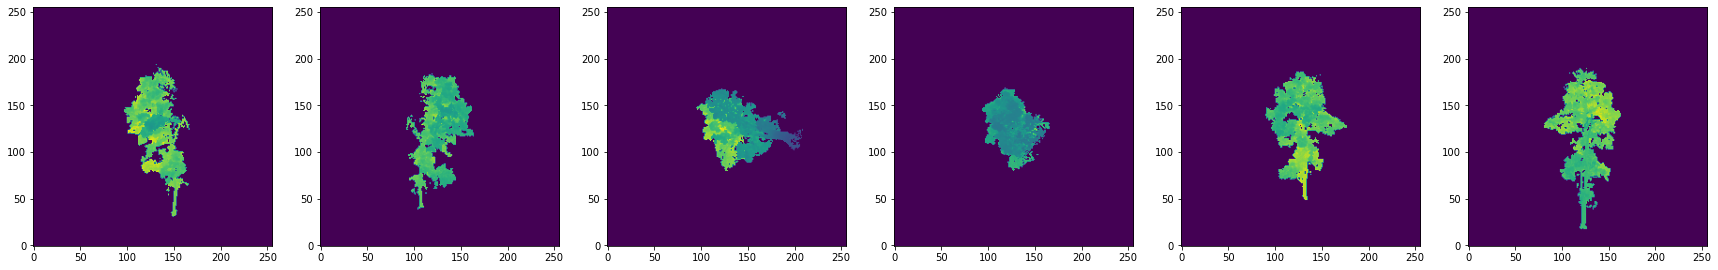

In [4]:
%%time
sample_images = utils.get_depth_images_from_cloud(cloud, image_dim=256, use_hard_min=False)
utils.plot_depth_images(sample_images)

In [5]:
%%time
metadata_file = "../data/treesXYZ_2/meta/META.csv"
data_dir = "../data/treesXYZ_2/"

image_dim=256
trees_dataset = utils.TreeSpeciesPointDataset(data_dir=data_dir, 
                                         metadata_file=metadata_file,
                                         )

params = {
    "image_dim":256,
    "camera_fov_deg":90,
    "f":1,
    "camera_dist":1.4,
    "soft_min_k":50
}

trees_dataset.set_params(**params)

100%|██████████| 20/20 [00:36<00:00,  1.82s/it]

CPU times: user 36.2 s, sys: 264 ms, total: 36.5 s
Wall time: 36.4 s


In [6]:
torch.save(trees_dataset, "tree_points_small.pt")